In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
import scipy.stats

from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler, QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,f1_score,roc_curve,precision_score,recall_score

In [2]:
impute =SimpleImputer()

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Assessment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
df.shape

(5110, 12)

In [9]:
df[df.bmi.isnull()].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


In [10]:
df.corr()

C:\Users\YUSUF\AppData\Local\Temp\ipykernel_12920\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


C:\Users\YUSUF\AppData\Local\Temp\ipykernel_12920\3442138956.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr())


<Axes: >

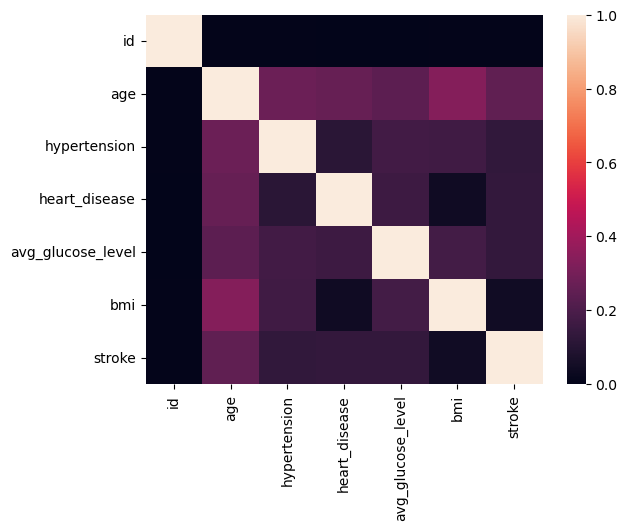

In [11]:
sb.heatmap(df.corr())

In [12]:
df.id.duplicated().sum()

0

## Data Cleaning

In [13]:
df_copy = df.copy()

In [14]:
df_copy.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
df_copy.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [16]:
df_copy.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [17]:
df_copy.hypertension.unique()

array([0, 1], dtype=int64)

In [18]:
df_copy.heart_disease.unique()

array([1, 0], dtype=int64)

In [19]:
df_copy.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df_copy.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [21]:
df_copy.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [22]:
df_copy.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [23]:
df_copy.stroke.unique()

array([1, 0], dtype=int64)

In [24]:
df_copy.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [25]:
df_copy.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [26]:
df_copy.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

<Axes: xlabel='bmi', ylabel='Density'>

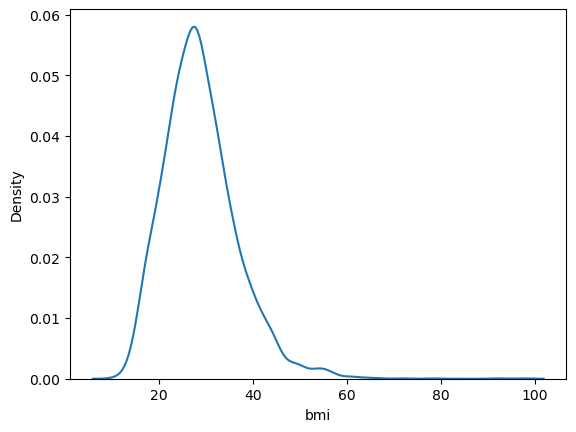

In [27]:
sb.kdeplot(data=df_copy,x='bmi')
#plt.xscale('log')

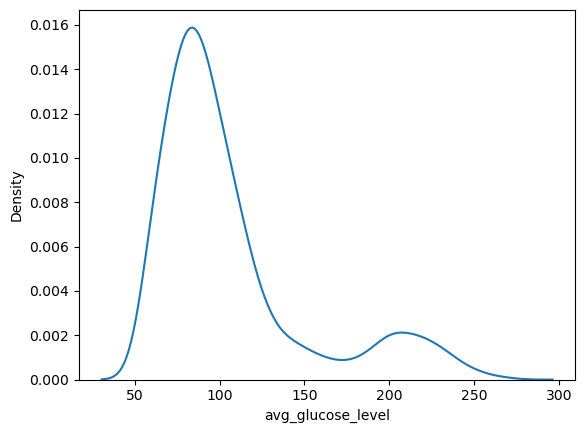

In [28]:
sb.kdeplot(data=df_copy,x='avg_glucose_level');

Assessment
Quality issue
- Drop id column for high cardinality
- BMI values above 39
- 

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

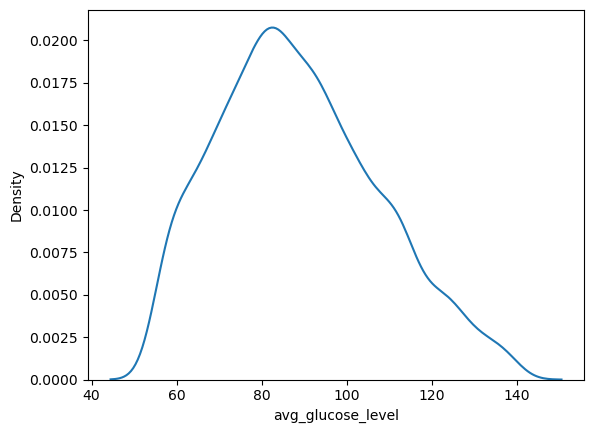

In [29]:
sb.kdeplot(df_copy[df_copy['avg_glucose_level'] < 140]['avg_glucose_level'])

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

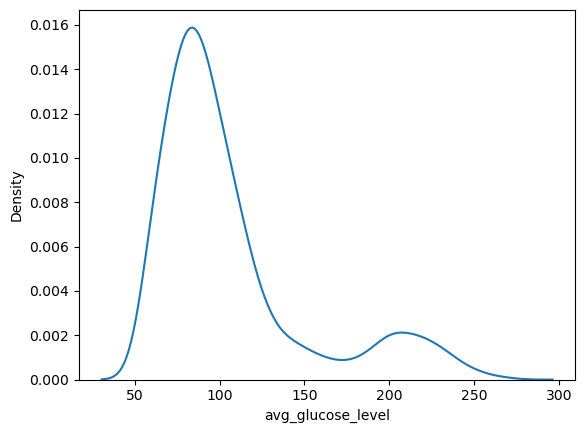

In [30]:
sb.kdeplot(df_copy['avg_glucose_level'])

In [31]:
df_copy.skew()

C:\Users\YUSUF\AppData\Local\Temp\ipykernel_12920\3825420885.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.skew()


id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [32]:
df_copy.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [33]:
df_copy.drop(columns='id',inplace=True)

In [34]:
df_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [35]:
df_copy.duplicated().sum()

0

In [36]:
df_copy.shape

(5110, 11)

In [37]:
df_copy.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [38]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [39]:
df_copy.hypertension.unique()

array([0, 1], dtype=int64)

In [40]:
df_copy.heart_disease.unique()

array([1, 0], dtype=int64)

In [41]:
df_copy.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [42]:
df_copy.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [43]:
df_copy.select_dtypes('number').columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [44]:
df_copy.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [45]:
df_copy.skew()

C:\Users\YUSUF\AppData\Local\Temp\ipykernel_12920\3825420885.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.skew()


age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [46]:
def number_p_value(column):
    X = df_copy['stroke']
    y = df_copy[column]
    
    X = sm.add_constant(X)
    
    model = sm.OLS(y,X).fit()
    
    return model.summary()

In [47]:
number_p_value('age')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     326.9
Date:                Sun, 28 May 2023   Prob (F-statistic):           7.03e-71
Time:                        22:20:21   Log-Likelihood:                -23027.
No. Observations:                5110   AIC:                         4.606e+04
Df Residuals:                    5108   BIC:                         4.607e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9715      0.314    133.473      0.000      41.355      42.588
stroke        25.7566      1.425     18.081      0.000      22.964      28.549
==============================================================================
Omnibus:                      731.680   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.679
Skew:                          -0.104   Prob(JB):                     7.90e-41
Kurtosis:                       2.092   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
encoder = LabelEncoder()
df_copy['gender'] = encoder.fit_transform(df_copy['gender'])
df_copy['ever_married'] = encoder.fit_transform(df_copy['ever_married'])
df_copy['work_type'] = encoder.fit_transform(df_copy['work_type'])
df_copy['Residence_type'] = encoder.fit_transform(df_copy['Residence_type'])
df_copy['smoking_status'] = encoder.fit_transform(df_copy['smoking_status'])
#df_copy['age_group'] = encoder.fit_transform(df_copy['age_group'])
#df_copy['diabetes_status'] = encoder.fit_transform(df_copy['diabetes_status'])

In [49]:
df_copy.dropna(inplace=True)

## Splitting Data and Oversampling Data

In [50]:
X = df_copy.drop(columns='stroke')
y = df_copy['stroke']

In [51]:
df_copy['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [52]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [54]:
over_sampler = RandomOverSampler()
X_train_over,y_train_over = over_sampler.fit_resample(X_train,y_train)

In [55]:
y_train.value_counts()

0    3524
1     157
Name: stroke, dtype: int64

In [56]:
y_train_over.value_counts()

0    3524
1    3524
Name: stroke, dtype: int64

In [57]:
X_train_over.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [58]:
X_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7048 non-null   int32  
 1   age                7048 non-null   float64
 2   hypertension       7048 non-null   int64  
 3   heart_disease      7048 non-null   int64  
 4   ever_married       7048 non-null   int32  
 5   work_type          7048 non-null   int32  
 6   Residence_type     7048 non-null   int32  
 7   avg_glucose_level  7048 non-null   float64
 8   bmi                7048 non-null   float64
 9   smoking_status     7048 non-null   int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 413.1 KB


## Model Training and Evaluation.

In [63]:
def confusion_matrix(model,x= X_test,y = y_test):
    y_pred = model.predict(x)
    ConfusionMatrixDisplay.from_predictions(y,y_pred)

In [59]:
rand_over = RandomForestClassifier(random_state=42)
rand_over.fit(X_train_over,y_train_over)

RandomForestClassifier(random_state=42)

In [60]:
rand_over.score(X_test,y_test)

0.9495114006514658

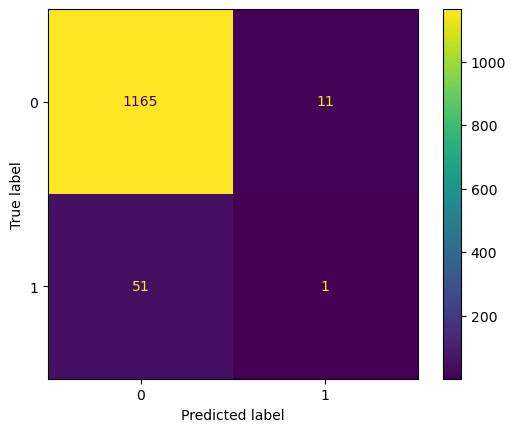

In [64]:
confusion_matrix(rand_over)

In [65]:
rand = RandomForestClassifier(random_state=42)
rand.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [66]:
rand.score(X_test,y_test)

0.9568403908794788

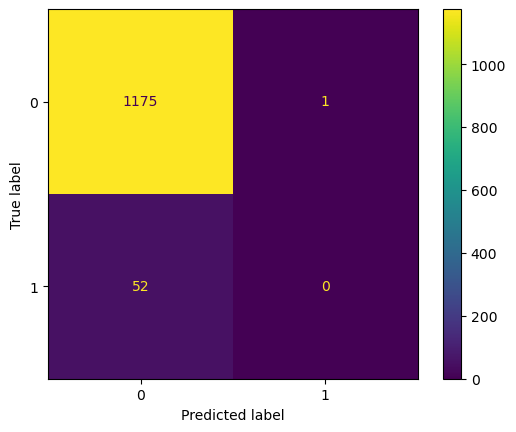

In [70]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train,y_train)
model_tree.score(X_test,y_test)

0.9144951140065146

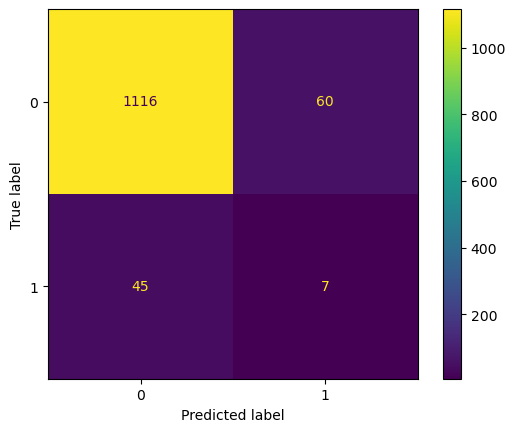

In [71]:
confusion_matrix(model_tree)

In [72]:
tree_over = DecisionTreeClassifier(random_state=42)
tree_over.fit(X_train_over,y_train_over)
tree_over.score(X_test,y_test)

0.9201954397394136

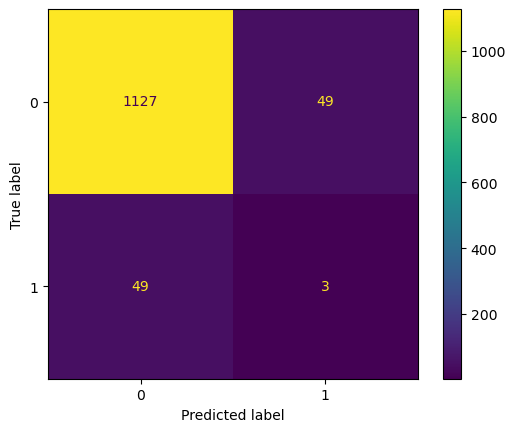

In [73]:
confusion_matrix(tree_over)

In [74]:
param = {
        'max_depth':range(1,10,2),
        'criterion' : ['gini','entropy','log_loss']
}

In [75]:
clf_tree_over = GridSearchCV(tree_over,
                  param_grid=param,
                  verbose=1,
                  n_jobs=-1,
                  cv=5)
clf_tree_over.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 10, 2)},
             verbose=1)

In [ ]:
import pickle
stroke_status = open('stroke_status_predictor.pkl','wb')
pickle.dump(xgb_20,stroke_status)
stroke_status.close()